# Business Insights from Active Companies in Belgium

Load the necessary libraries and set up the environment for data analysis.

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to KBO database
conn = sqlite3.connect(r'./data/kbo_database.db')

Run a test query to check the connection to the database and retrieve the first 10 rows from the `enterprises` table.

In [ ]:

query = """
    SELECT *
    FROM enterprise
    LIMIT 5;
"""
df = pd.read_sql_query(query, conn)
df.head()

,EnterpriseNumber,Status,JuridicalSituation,TypeOfEnterprise,JuridicalForm,JuridicalFormCAC,StartDate
0,0200.065.765,AC,0,2,416.0,None,09-08-1960
1,0200.068.636,AC,0,2,417.0,None,16-02-1923
2,0200.171.970,AC,0,2,116.0,None,01-01-1968
3,0200.245.711,AC,12,2,116.0,None,01-01-1922
4,0200.305.493,AC,0,2,416.0,None,19-03-1962


Get a list of enterprises with some of their details from the `code` table.

In [ ]:
query = """
    SELECT 
        EnterpriseNumber,
        te.Description AS TypeOfEnterprise,
        cs.Description AS Status,
        cjs.Description AS JuridicalSituation,
        cjf.Description AS JuridicalForm,
        cjfcac.Description AS JuridicalFormCAC,
        StartDate
    FROM enterprise AS e
    INNER JOIN code AS te
        ON te.Category = 'TypeOfEnterprise'
        AND te.Language = 'FR'
        AND e.TypeOfEnterprise = te.Code
    INNER JOIN code AS cs
        ON cs.Category = 'Status'
        AND cs.Language = 'FR'
        AND e.Status = cs.Code
    INNER JOIN code AS cjs
        ON cjs.Category = 'JuridicalSituation'
        AND cjs.Language = 'FR'
        AND e.JuridicalSituation = cjs.Code
    INNER JOIN code AS cjf
        ON cjf.Category = 'JuridicalForm'
        AND cjf.Language = 'FR'
        AND e.JuridicalForm = cjf.Code	
    INNER JOIN code AS cjfcac
        ON cjfcac.Category = 'JuridicalForm'
        AND cjfcac.Language = 'FR'
        AND e.JuridicalFormCAC = cjfcac.Code	
    LIMIT 10;
"""

df = pd.read_sql_query(query, conn)
df.head()

,EnterpriseNumber,TypeOfEnterprise,Status,JuridicalSituation,JuridicalForm,JuridicalFormCAC,StartDate
0,0400.000.680,Personne morale,Actif,Situation normale,Société privée à responsabilité limitée,Société à responsabilité limitée,28-06-1968
1,0400.001.373,Personne morale,Actif,Dissolution volontaire – liquidation,Société privée à responsabilité limitée,Société à responsabilité limitée,01-10-1968
2,0400.004.640,Personne morale,Actif,Dissolution volontaire – liquidation,Société privée à responsabilité limitée,Société à responsabilité limitée,12-10-1968
3,0400.006.026,Personne morale,Actif,Dissolution volontaire – liquidation,Société privée à responsabilité limitée,Société à responsabilité limitée,01-10-1966
4,0400.009.093,Personne morale,Actif,Réunion des parts en une seule main,Société privée à responsabilité limitée,Société à responsabilité limitée,04-10-1968


## Which percentage of companies are under which juridical situation?

In [ ]:
query = """
    SELECT 
        cjs.Description AS JuridicalSituation,
        COUNT(*) AS count,
        ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM enterprise), 2) AS percentage
    FROM enterprise AS e
    INNER JOIN code AS cjs
        ON cjs.Category = 'JuridicalSituation'
        AND cjs.Language = 'FR'
        AND e.JuridicalSituation = cjs.Code
    GROUP BY JuridicalSituation
    ORDER BY count DESC;
"""

df = pd.read_sql_query(query, conn)
df.head(20)

,JuridicalSituation,count,percentage
0,Situation normale,1862383,96.68
1,Ouverture de faillite,32386,1.68
2,Dissolution volontaire – liquidation,25070,1.30
3,Dissolution judiciaire ou nullité,3506,0.18
4,Réunion des parts en une seule main,1457,0.08
5,Dissolution de plein droit,578,0.03
6,Concordat judiciaire avant faillite,423,0.02
7,Sursis (réorganisation judiciaire),250,0.01
8,Ouverture de faillite avec excusabilité,41,0.00
9,Réouverture de liquidation,39,0.00


## Which percentage of companies are under which juridical form?

In [ ]:
query = """
    SELECT 
        cjf.Description AS JuridicalForm,
        COUNT(*) AS count,
        ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM enterprise), 3) AS percentage
    FROM enterprise AS e
    INNER JOIN code AS cjf
        ON cjf.Category = 'JuridicalForm'
        AND cjf.Language = 'FR'
        AND e.JuridicalForm = cjf.Code	
    GROUP BY JuridicalForm
    ORDER BY count DESC;
"""

df = pd.read_sql_query(query, conn)
df.head(110)

,JuridicalForm,count,percentage
0,Société à responsabilité limitée,493384,25.614
1,Association sans but lucratif,139213,7.227
2,Association des copropriétaires,108445,5.630
3,Société privée à responsabilité limitée,86541,4.493
4,Société anonyme,80675,4.188
5,Entité étrangère,67576,3.508
6,Société en commandite,47352,2.458
7,Société ou association sans personnalité jurid...,27737,1.440
8,Société en nom collectif,24888,1.292
9,Société en commandite simple,16182,0.840


## What is the distribution of company statuses?

In [24]:
query = """
    SELECT 
        cs.Description AS Status,
        COUNT(*) AS count,
        ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM enterprise), 2) AS percentage
    FROM enterprise AS e
    INNER JOIN code AS cs
        ON cs.Category = 'Status'
        AND cs.Language = 'FR'
        AND e.Status = cs.Code
    GROUP BY Status
    ORDER BY count DESC;
"""

df = pd.read_sql_query(query, conn)
df.head()

,Status,count,percentage
0,Actif,1926246,100.0


## What is the average company age by sector?

In [70]:
query = """
    SELECT 
        a.NaceCode,
        COUNT(*) AS CompanyCount,
        CAST(AVG(CAST(STRFTIME('%Y', 'now') AS INTEGER) - CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER)) AS INTEGER) AS AvgCompanyAge
    FROM activity a
    JOIN enterprise e 
        ON a.EntityNumber = e.EnterpriseNumber
    WHERE a.Classification = 'MAIN'
        AND e.StartDate IS NOT NULL
    GROUP BY a.NaceCode
    ORDER BY AvgCompanyAge DESC
    LIMIT 20;
"""
df_comp_age = pd.read_sql_query(query, conn)

query_code = """
    SELECT Code, Description
    FROM code
    WHERE Category IN ('Nace2003', 'Nace2008', 'Nace2025') 
        AND Language = 'FR'
"""
df_codes = pd.read_sql_query(query_code, conn)

# Ensure types match for the merge key
df_comp_age['NaceCode'] = df_comp_age['NaceCode'].astype(str)
df_codes['Code'] = df_codes['Code'].astype(str)

# Merge on code
df_merged = df_comp_age.merge(df_codes, left_on='NaceCode', right_on='Code', how='left')

# Drop the 'NaceCode' column and rename 'Description'
df_merged = df_merged.drop(columns=['NaceCode'])
df_merged = df_merged.rename(columns={'Description': 'Sector'})

# Reorder columns
df_merged = df_merged[['Sector', 'CompanyCount', 'AvgCompanyAge']]

df_merged.head(50)

,Sector,CompanyCount,AvgCompanyAge
0,Enseignement secondaire professionnel ou technique organisé par les forces armées,1,96
1,Mutuelles et caisses d'assurance soins,32,82
2,Location de logements sociaux,138,76
3,Entreprises d'assurances multibranches à prédominance non-vie,29,74
4,Autre distribution de crédit,53,71
5,Extraction et agglomération de la houille,15,68
6,Fabrication d'appareils de téléphonie,7,65
7,"Administration communale, à l'exclusion des C.P.A.S.",40,62
8,Location et exploitation de logements sociaux,518,60
9,Location et exploitation de logements sociaux,518,60


## What is the company creation trend over the years?

In [65]:
query = """
    SELECT 
	    CAST(SUBSTR(StartDate, 7, 4) AS INTEGER) AS year,
	    COUNT(*) AS NewCompanies
    FROM enterprise
    WHERE StartDate IS NOT NULL
    GROUP BY year
    ORDER BY year ASC;
"""

df = pd.read_sql_query(query, conn)
df.head(100)


,year,NewCompanies
0,1618,1
1,1800,5776
2,1802,1
3,1803,1
4,1804,2
5,1809,3
6,1810,3
7,1813,1
8,1814,1
9,1815,3


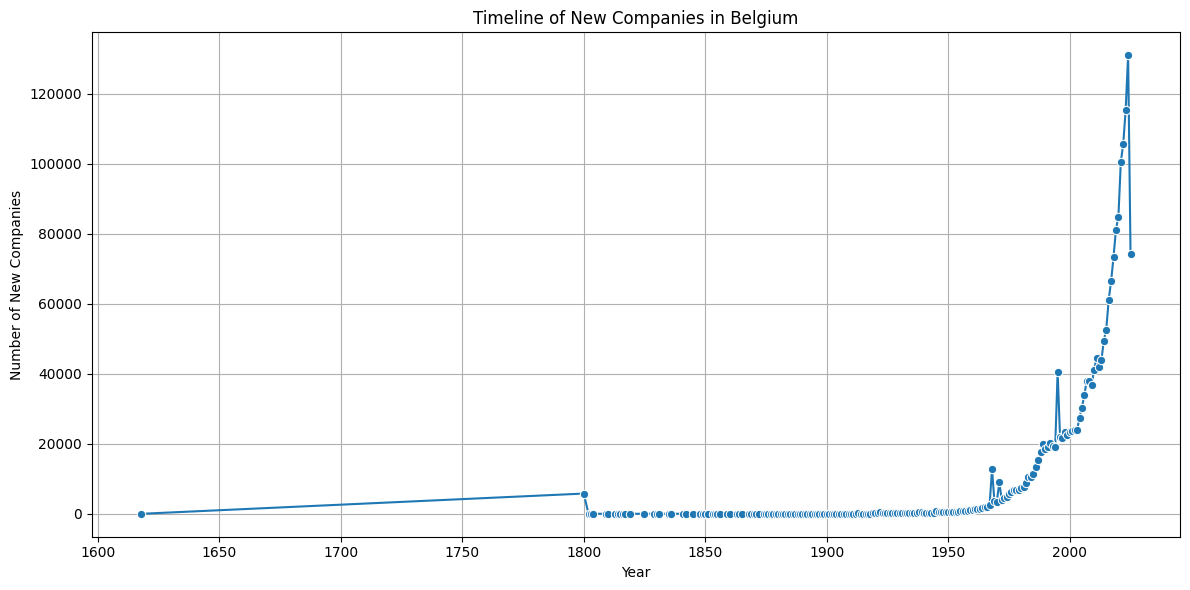

In [ ]:
# Plot the number of new companies per year
df = df.sort_values('year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='NewCompanies', marker='o')

plt.title('Timeline of New Companies in Belgium')
plt.xlabel('Year')
plt.ylabel('Number of New Companies')
plt.grid(True)
plt.tight_layout()
plt.show()

## What is the distribution of companies per municipality?

In [25]:
query = """
    SELECT 
        MunicipalityFR AS Municipality,
        COUNT(*) AS CompanyCount
    FROM address
    WHERE TypeOfAddress = 'REGO'
    GROUP BY Municipality
    ORDER BY CompanyCount DESC
    LIMIT 20;
"""

df  = pd.read_sql_query(query, conn)
df.head(50)

,Municipality,CompanyCount
0,Antwerpen,61774
1,Bruxelles,40777
2,Gent,29230
3,Ixelles,20182
4,Liège,16176
5,Uccle,15652
6,Schaerbeek,13384
7,Anderlecht,12472
8,Brugge,11901
9,Hasselt,11360


## What are the year-over-year growth trends by sector?

In [ ]:
query = """
    SELECT 
        a.NaceCode,
        CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) AS StartYear,
        COUNT(*) AS CompaniesCreated
    FROM enterprise e
    JOIN activity a 
        ON e.EnterpriseNumber = a.EntityNumber
    WHERE e.StartDate IS NOT NULL
        AND a.Classification = 'MAIN'
    GROUP BY StartYear, a.NaceCode
    ORDER BY a.NaceCode, StartYear;
"""
df_growth = pd.read_sql_query(query, conn)

query_code = """
    SELECT Code, Description
    FROM code
    WHERE Category IN ('Nace2003', 'Nace2008', 'Nace2025') 
        AND Language = 'FR'
"""
df_codes = pd.read_sql_query(query_code, conn)

# Ensure types match for the merge key
df_growth['NaceCode'] = df_growth['NaceCode'].astype(str)
df_codes['Code'] = df_codes['Code'].astype(str)

# Merge on code
df_merged = df_growth.merge(df_codes, left_on='NaceCode', right_on='Code', how='left')

# Drop the 'NaceCode' column and rename 'Description'
df_merged = df_merged.drop(columns=['NaceCode'])
df_merged = df_merged.rename(columns={'Description': 'Sector'})

# Reorder columns
df_merged = df_merged[['Sector', 'StartYear', 'CompaniesCreated']]

df_merged.head(100)

,Sector,StartYear,CompaniesCreated
0,Extraction de pétrole brut et de gaz naturel,1943,2
1,Extraction de pétrole brut et de gaz naturel,1945,2
2,Extraction de pétrole brut et de gaz naturel,1958,2
3,Extraction de pétrole brut et de gaz naturel,1960,3
4,Extraction de pétrole brut et de gaz naturel,1961,3
5,Extraction de pétrole brut et de gaz naturel,1962,2
6,Extraction de pétrole brut et de gaz naturel,1965,6
7,Extraction de pétrole brut et de gaz naturel,1966,6
8,Extraction de pétrole brut et de gaz naturel,1967,9
9,Extraction de pétrole brut et de gaz naturel,1968,16


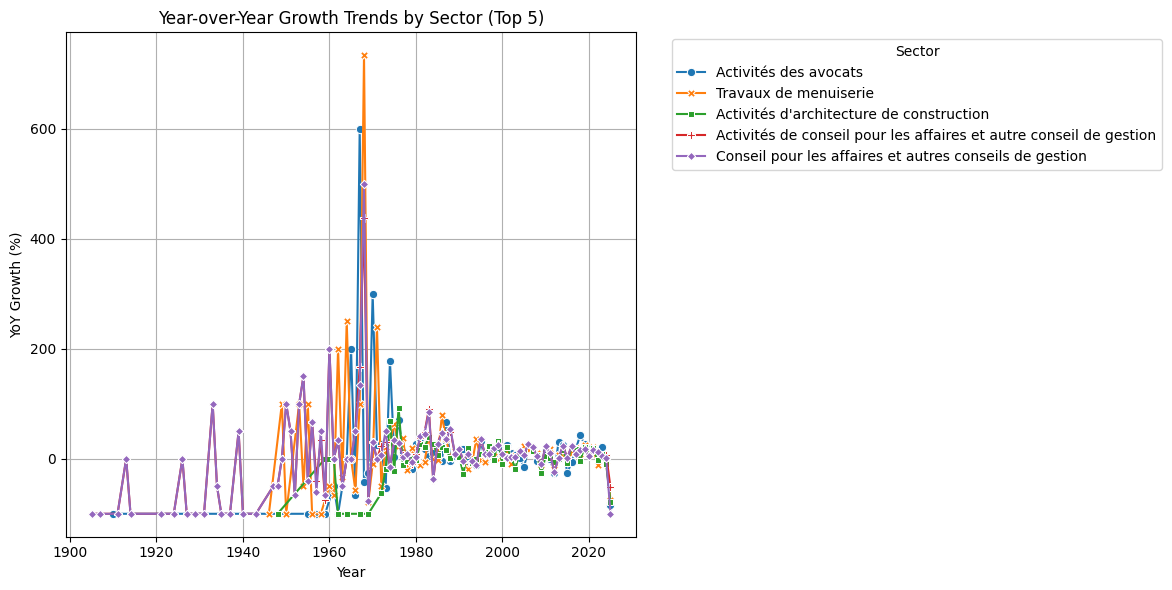

In [68]:
# Aggregate by StartYear and Sector to ensure unique pairs
df_agg = df_merged.groupby(['StartYear', 'Sector'], as_index=False)['CompaniesCreated'].sum()

# Now pivot
pivot = df_agg.pivot(index='StartYear', columns='Sector', values='CompaniesCreated').fillna(0)
pivot = pivot[pivot.index > 1900]

# Calculate Year-over-Year (YoY) growth % per sector
yoy_growth = pivot.pct_change() * 100
yoy_growth = yoy_growth.round(1)

# Select top sectors by total companies created for clarity (e.g., top 5)
top_sectors = pivot.sum().sort_values(ascending=False).head(5).index

# Plot YoY growth for top sectors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yoy_growth[top_sectors], markers=True, dashes=False)
plt.title('Year-over-Year Growth Trends by Sector (Top 5)')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## What are the seasonal patterns for company creation?

In [ ]:
query = """
    SELECT 
        CAST(SUBSTR(StartDate, 4, 2) AS INTEGER) AS Month,
        COUNT(*) AS CompaniesCreated
    FROM enterprise
    WHERE StartDate IS NOT NULL
    GROUP BY Month
    ORDER BY Month;
"""

df = pd.read_sql_query(query, conn)
df.head(12)

,Month,CompaniesCreated
0,1,262813
1,2,144267
2,3,140084
3,4,190441
4,5,129974
5,6,129013
6,7,172372
7,8,124611
8,9,130018
9,10,220905


## Which are the top 3 rising sectors per region in the last 5 years?

In [58]:
query = """
    WITH recent_companies AS (
        SELECT 
            e.EnterpriseNumber,
            CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) AS StartYear
        FROM enterprise e
        WHERE e.StartDate IS NOT NULL
            AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) >= (CAST(STRFTIME('%Y', 'now') AS INTEGER) - 5)
    ),
    sector_region_counts AS (
        SELECT 
            rc.EnterpriseNumber,
            rc.StartYear,
            a.NaceCode,
            ad.MunicipalityFR AS Region
        FROM recent_companies rc
        JOIN activity a ON rc.EnterpriseNumber = a.EntityNumber
        JOIN address ad ON rc.EnterpriseNumber = ad.EntityNumber
        WHERE a.Classification = 'MAIN'
        AND ad.TypeOfAddress = 'REGO'
    ),
    agg_counts AS (
        SELECT 
            Region,
            NaceCode,
            SUM(CASE WHEN StartYear = (CAST(STRFTIME('%Y', 'now') AS INTEGER) - 5) THEN 1 ELSE 0 END) AS CountFirstYear,
            SUM(CASE WHEN StartYear = CAST(STRFTIME('%Y', 'now') AS INTEGER) THEN 1 ELSE 0 END) AS CountLastYear
        FROM sector_region_counts
        GROUP BY Region, NaceCode
    ),
    growth_calc AS (
        SELECT 
            Region,
            NaceCode,
            CountFirstYear,
            CountLastYear,
            CASE 
                WHEN CountFirstYear = 0 THEN NULL
                ELSE ((CAST(CountLastYear AS FLOAT) - CountFirstYear) / CountFirstYear) * 100.0
            END AS GrowthPercent
        FROM agg_counts
    )
    SELECT gr.Region, gr.NaceCode, gr.GrowthPercent
    FROM growth_calc gr
    WHERE gr.GrowthPercent IS NOT NULL
        AND gr.GrowthPercent > 0
        AND gr.Region IS NOT NULL
        AND gr.NaceCode IS NOT NULL
        AND (
            SELECT COUNT(*)
            FROM growth_calc gr2
            WHERE gr2.Region = gr.Region AND gr2.GrowthPercent > gr.GrowthPercent
        ) < 3
    ORDER BY gr.Region, gr.GrowthPercent DESC;
"""
df_growth = pd.read_sql_query(query, conn)

query_code = """
    SELECT Code, Description
    FROM code
    WHERE Category IN ('Nace2003', 'Nace2008', 'Nace2025') 
        AND Language = 'FR'
"""
df_codes = pd.read_sql_query(query_code, conn)

# Ensure types match for the merge key
df_growth['NaceCode'] = df_growth['NaceCode'].astype(str)
df_codes['Code'] = df_codes['Code'].astype(str)

# Merge on code
df_merged = df_growth.merge(df_codes, left_on='NaceCode', right_on='Code', how='left')

# Drop the 'NaceCode' column and rename 'Description'
df_merged = df_merged.drop(columns=['NaceCode'])
df_merged = df_merged.rename(columns={'Description': 'Sector'})

# Reorder columns
df_merged = df_merged[['Region', 'Sector', 'GrowthPercent']]

df_merged.head(500)

,Region,Sector,GrowthPercent
0,Aalst,Activités de service de transport de voyageurs sur demande par véhicule avec chauffeur,300.0
1,Aalst,"Commerce de détail de voitures et de véhicules automobiles légers (<= 3,5 tonnes)",200.0
2,Aalst,Services des traiteurs,150.0
3,Aalst,Activités de traiteur événementiel,150.0
4,Aalter,Commerce de détail non spécialisé dans lequel les produits alimentaires et le tabac prédominent,100.0
...,...,...,...
495,Sint-Truiden,NaN,150.0
496,Sint-Truiden,Autres travaux de finition,100.0
497,Sint-Truiden,"Restauration à service restreint, à l'exclusion de restauration mobile",100.0
498,Spa,Restauration à service complet,400.0
